In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setup
## Importing Dataset

In [268]:
exotic_crops_df = pd.read_csv('../Datasets/imported_crops.csv')
exotic_crops_df

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean
0,Broccoli,-0.395067,0.072551,-0.299363,-0.730196,-2.464421,-0.741455,0.391420
1,Kiwi,2.862921,1.770581,2.169387,-0.478527,-1.615034,-1.031437,-0.317673
2,Strawberry,2.785872,-0.024274,2.111003,0.211918,0.715227,0.089651,-1.090468
3,Raspberry,0.101274,1.882509,0.076741,-0.042715,-0.144162,1.672384,1.003334
4,Blackberry,1.407498,0.950132,1.066535,-0.302464,-1.020819,1.163085,-0.754451
5,Blueberry,2.357679,0.877938,1.786538,-0.130474,-0.440350,-0.535160,0.787041
6,Avocado,1.262562,1.606164,0.956710,0.060027,0.202592,-0.639949,0.842109
7,Lettuce,0.301153,-0.477937,0.228199,-0.307976,-1.039423,0.226464,2.252677
8,Celery,-0.530951,1.364232,-0.402330,-0.633418,-2.137792,0.733279,2.124691
9,"Bell peppers (Red, Yellow, Orange)",0.453253,0.235062,0.343454,0.097674,0.329650,-0.268902,-0.443299


In [269]:
local_crops_df = pd.read_csv('../Datasets/populate_data.csv')
local_crops_df

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean
0,Rice,2.589890,-0.680122,-0.739135,0.313570,1.058304,0.703327,1.395175
1,Wheat,1.225176,0.390698,-0.728476,0.004340,0.014647,1.799890,0.326655
2,Cotton,0.747869,0.391575,-0.717816,-0.368993,-1.245356,-0.164976,1.836870
3,Jute,0.037714,0.308731,-0.707157,0.019014,0.064172,-1.308706,1.988913
4,Sugarcane,0.568869,1.284250,-0.696498,-0.540578,-1.824458,0.605424,-0.663376
...,...,...,...,...,...,...,...,...
95,Safflowerseed,2.298448,0.848534,0.273503,-0.247213,-0.834347,-0.158261,1.065747
96,Deccan Hemp,-0.153785,-0.411203,0.284163,-0.166120,-0.560658,0.798191,-0.018888
97,Sunn Hemp,-0.729022,1.834669,0.294822,-0.486102,-1.640599,-0.936832,0.988271
98,Subabul,2.232904,0.323228,0.305482,-0.255178,-0.861230,-0.375688,2.050787


# UCB with budget as money

In [270]:
local_crops_df['budget'] = np.random.randint(100, 1000, size=len(local_crops_df))
exotic_crops_df['budget'] = np.random.randint(100, 1000, size=len(exotic_crops_df))
local_crops_df

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean,budget
0,Rice,2.589890,-0.680122,-0.739135,0.313570,1.058304,0.703327,1.395175,633
1,Wheat,1.225176,0.390698,-0.728476,0.004340,0.014647,1.799890,0.326655,992
2,Cotton,0.747869,0.391575,-0.717816,-0.368993,-1.245356,-0.164976,1.836870,802
3,Jute,0.037714,0.308731,-0.707157,0.019014,0.064172,-1.308706,1.988913,686
4,Sugarcane,0.568869,1.284250,-0.696498,-0.540578,-1.824458,0.605424,-0.663376,479
...,...,...,...,...,...,...,...,...,...
95,Safflowerseed,2.298448,0.848534,0.273503,-0.247213,-0.834347,-0.158261,1.065747,965
96,Deccan Hemp,-0.153785,-0.411203,0.284163,-0.166120,-0.560658,0.798191,-0.018888,413
97,Sunn Hemp,-0.729022,1.834669,0.294822,-0.486102,-1.640599,-0.936832,0.988271,248
98,Subabul,2.232904,0.323228,0.305482,-0.255178,-0.861230,-0.375688,2.050787,708


In [271]:
farmer_preferences = {
    'K_mean': -2,
    'N_mean': -1,
    'P_mean': 0.3,
    'temperature_mean': -1.1,
    'humidity_mean': -0.2,
    'ph_mean': 1,
    'rainfall_mean': 2,
    'budget': 1000
}

# Define the function to calculate rewards and find the optimal crop
def calculate_rewards_and_find_optimal_crop(data, farmer_preferences):
    # Initialize a list to store rewards
    rewards = []

    # Iterate through each crop in the DataFrame
    for index, row in data.iterrows():
        # Calculate MSE between the crop and farmer preferences, excluding the budget
        mse = np.mean([(row[key] - farmer_preferences[key]) ** 2 for key in farmer_preferences if key != 'budget'])
        
        # Calculate reward from MSE (higher reward for lower MSE)
        reward = 1 / (1 + mse)

        # Append reward to the list
        rewards.append(reward)
    
    # Add the rewards as a new column in the DataFrame
    data['normalized_reward'] = rewards
    
    # Sort the DataFrame based on rewards in descending order
    data_sorted = data.sort_values(by='normalized_reward', ascending=False)
    
    return data_sorted

# Example usage
# local_crops_df and exotic_crops_df should be defined as pandas DataFrames with the crop data
local_crops_df_updated_forbudget = calculate_rewards_and_find_optimal_crop(local_crops_df, farmer_preferences)
exotic_crops_df_updated_forbudget = calculate_rewards_and_find_optimal_crop(exotic_crops_df, farmer_preferences)

local_crops_df_updated_forbudget


,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean,budget,normalized_reward
56,Moth Bean,-0.520827,-0.740671,-0.142211,-0.245031,-0.826983,0.833300,1.569196,776,0.648856
30,Guava,-0.297814,-0.360700,-0.419355,-0.165894,-0.559896,0.638902,2.347243,194,0.579630
77,Fenugreek (Leaves),-0.660889,-0.408289,0.081635,-0.275660,-0.930356,-0.541103,2.413125,997,0.540555
85,Custard Apple,0.068449,-0.517103,0.166910,-0.065594,-0.221381,1.513700,1.512811,134,0.534307
29,Grapes,-0.231412,0.357936,-0.430014,-0.258157,-0.871284,0.909329,2.502423,355,0.502701
...,...,...,...,...,...,...,...,...,...,...
17,Orange,2.697332,1.560156,-0.557926,-0.406481,-1.371877,-1.329484,2.318929,151,0.160045
51,Masoor,2.304603,0.512438,-0.195508,-0.043893,-0.148140,-1.311996,-1.088633,545,0.158854
86,Bael,2.474769,0.165054,0.177569,-0.704323,-2.377099,-0.746761,-1.019847,791,0.153972
33,Papaya,2.856264,-0.077243,-0.387376,-0.227130,-0.766567,-0.741397,-1.090621,979,0.153594


In [272]:
def observe_reward(data, crop_index):
    return data.loc[crop_index, 'normalized_reward']


def ucb_algorithm_budget(data, farmer_preferences, alpha):
    total_crops = len(data)  # Number of crops in the dataset
    farmer_budget = farmer_preferences.get('budget', 0)  # Farmer's budget from preferences
    
    num_selections = np.zeros(total_crops)  # Number of times each crop is selected
    sums_of_rewards = np.zeros(total_crops)  # Sum of rewards for each crop
    ucb_values = np.zeros(total_crops)  # UCB values for each crop

    # Metrics to track over time
    arm_selections_over_time = [[] for _ in range(total_crops)]
    cumulative_rewards_over_time = []
    ucb_values_over_time = [[] for _ in range(total_crops)]

    # UCB algorithm
    cumulative_reward = 0  # Track cumulative reward over time
    for round_num in range(1, 5000):  # Use farmer's budget as number of rounds
        # Calculate UCB values for each crop
        for crop_index in range(total_crops):
            crop_budget = data.loc[crop_index, 'budget']
            if crop_budget > farmer_budget:
                # Skip crops that exceed the farmer's budget
                ucb_values[crop_index] = -np.inf
            elif num_selections[crop_index] == 0:
                ucb_values[crop_index] = np.inf  # Initial exploration (infinity)
            else:
                avg_reward = sums_of_rewards[crop_index] / num_selections[crop_index]
                delta_i = alpha * np.sqrt((np.log(round_num)) / num_selections[crop_index])
                ucb_values[crop_index] = avg_reward + delta_i
            
            # Track UCB values over time
            ucb_values_over_time[crop_index].append(ucb_values[crop_index])

        # Select the crop with the highest UCB value within the farmer's budget
        crop_selected = np.argmax(ucb_values)
        # Get the normalized reward for the selected crop
        observed_reward = observe_reward(data, crop_selected)

        # Update the selections and rewards
        num_selections[crop_selected] += 1
        sums_of_rewards[crop_selected] += observed_reward
        
        # Track arm selections over time
        for i in range(total_crops):
            arm_selections_over_time[i].append(num_selections[i])

        # Update cumulative reward and track it over time
        cumulative_reward += observed_reward
        cumulative_rewards_over_time.append(cumulative_reward)

    # Prepare the output: crop indices and associated UCB values
    top_crops_indices = np.argsort(-ucb_values)
    result = [(index, ucb_values[index]) for index in top_crops_indices]

    return arm_selections_over_time, cumulative_rewards_over_time, ucb_values_over_time, result


In [273]:
# Run the UCB algorithm for local crops
alpha = 20 # You can adjust the alpha value as needed
arm_selections_over_time_local, cumulative_rewards_over_time_local, ucb_values_over_time_local, local_results = ucb_algorithm_budget(local_crops_df_updated_forbudget, farmer_preferences, alpha)

# Run the UCB algorithm for exotic crops
arm_selections_over_time_exotic, cumulative_rewards_over_time_exotic, ucb_values_over_time_exotic, exotic_results = ucb_algorithm_budget(exotic_crops_df_updated_forbudget, farmer_preferences, alpha)

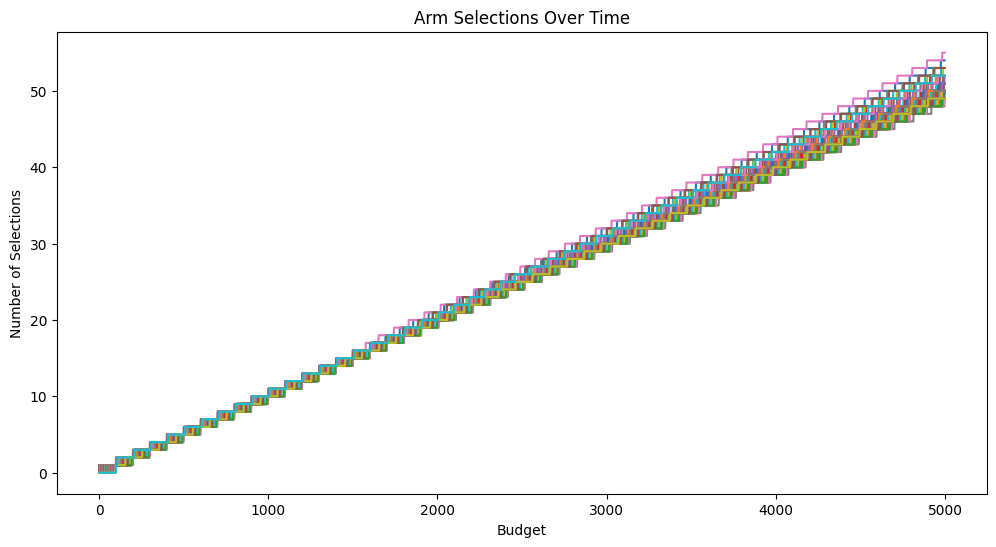

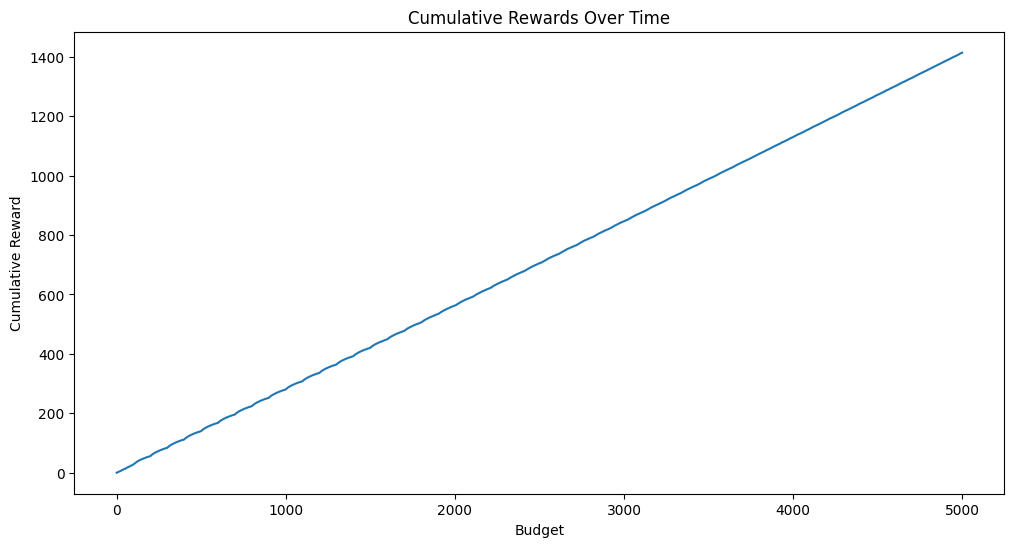

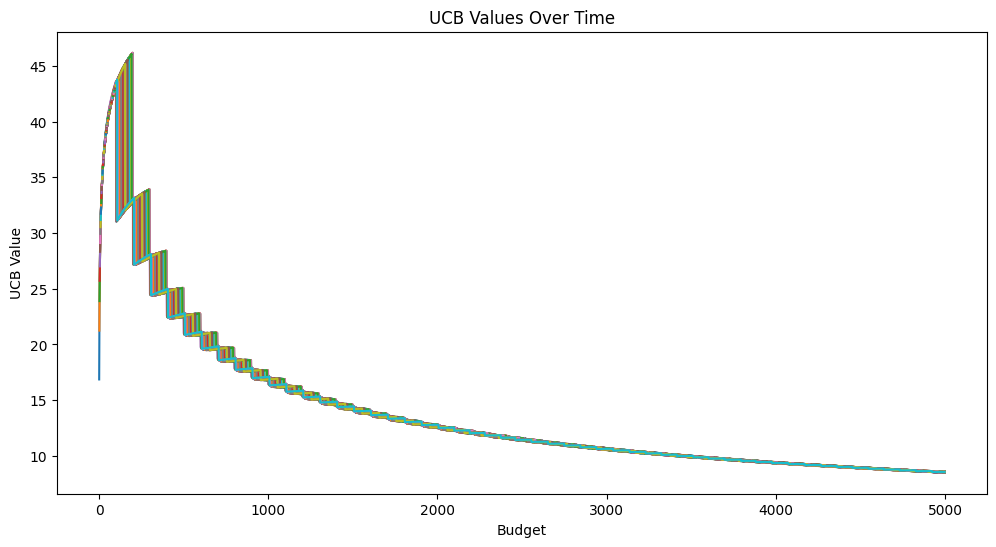

In [274]:
def plot_arm_selections(arm_selections, num_crops):
    plt.figure(figsize=(12, 6))
    for crop_index in range(num_crops):
        plt.plot(arm_selections[crop_index])
    plt.xlabel('Budget')
    plt.ylabel('Number of Selections')
    plt.title('Arm Selections Over Time')
    plt.show()

def plot_cumulative_rewards(cumulative_rewards):
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_rewards)
    plt.xlabel('Budget')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Rewards Over Time')
    plt.show()

def plot_ucb_values(ucb_values, num_crops):
    plt.figure(figsize=(12, 6))
    for crop_index in range(num_crops):
        plt.plot(ucb_values[crop_index])
    plt.xlabel('Budget')
    plt.ylabel('UCB Value')
    plt.title('UCB Values Over Time')
    plt.show()

plot_arm_selections(arm_selections_over_time_local, len(local_crops_df_updated_forbudget))
plot_cumulative_rewards(cumulative_rewards_over_time_local)
plot_ucb_values(ucb_values_over_time_local, len(local_crops_df_updated_forbudget))

# Get the top 4 local crops and top 1 imported crop
top_4_local_crops_indices = [index for index, _ in local_results[:4]]
top_1_imported_crop_index = exotic_results[0][0]


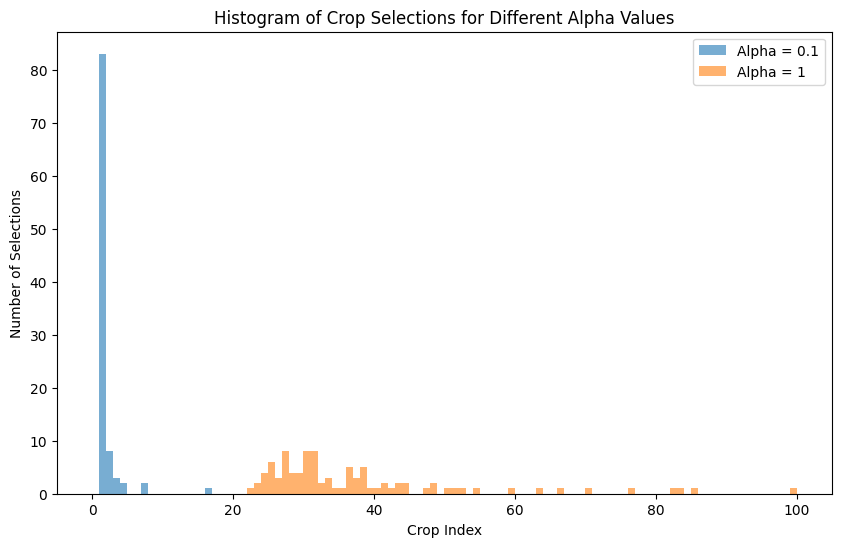

In [275]:
def plot_histogram_crop_selections(data, farmer_preferences, alphas):
    # Initialize a dictionary to store results for each alpha value
    results = {}
    
    for alpha in alphas:
        # Run the UCB algorithm for each alpha value
        arm_selections_over_time, cumulative_rewards_over_time, ucb_values_over_time, result = ucb_algorithm_budget(data, farmer_preferences, alpha)
        
        # Get final selections of crops
        final_selections = [selections[-1] for selections in arm_selections_over_time]
        
        # Store results
        results[alpha] = final_selections
    
    # Plot histogram of crop selections for each alpha value
    plt.figure(figsize=(10, 6))
    for alpha, selections in results.items():
        plt.hist(selections, bins=range(len(data) + 1), alpha=0.6, label=f'Alpha = {alpha}')
    
    plt.xlabel('Crop Index')
    plt.ylabel('Number of Selections')
    plt.title('Histogram of Crop Selections for Different Alpha Values')
    plt.legend()
    plt.show()

# Define alpha values you want to explore
alphas = [0.1, 1]

# Call the function
plot_histogram_crop_selections(local_crops_df_updated_forbudget, farmer_preferences, alphas)

In [276]:
# Display the results
print("\nTop 4 local crops based on UCB algorithm and farmer's preferences:")
for i, index in enumerate(top_4_local_crops_indices):
    crop = local_crops_df_updated_forbudget.loc[index]
    ucb_value = local_results[i][1]
    budget = crop['budget']
    print(f"Crop {i + 1}: {crop['Name']}, UCB Value: {ucb_value:.2f}, Budget: {budget}")

print("\nTop 1 imported crop based on UCB algorithm and farmer's preferences:")
imported_crop = exotic_crops_df_updated_forbudget.loc[top_1_imported_crop_index]
imported_ucb_value = exotic_results[0][1]
imported_budget = imported_crop['budget']
print(f"Name: {imported_crop['Name']}, UCB Value: {imported_ucb_value:.2f}, Budget: {imported_budget}")


Top 4 local crops based on UCB algorithm and farmer's preferences:
Crop 1: Flax, UCB Value: 8.58, Budget: 396
Crop 2: Chana, UCB Value: 8.57, Budget: 288
Crop 3: Niger, UCB Value: 8.57, Budget: 135
Crop 4: Bottle Gourd, UCB Value: 8.57, Budget: 710

Top 1 imported crop based on UCB algorithm and farmer's preferences:
Name: Broccoli, UCB Value: 3.95, Budget: 416


# Linear UCB

In [277]:
from sklearn.linear_model import LinearRegression

In [278]:
local_crops_df_updated_linear = local_crops_df
exotic_crops_df_updated_linear = exotic_crops_df
local_crops_df_updated_linear

,Name,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean,budget,normalized_reward
0,Rice,2.589890,-0.680122,-0.739135,0.313570,1.058304,0.703327,1.395175,633,0.210308
1,Wheat,1.225176,0.390698,-0.728476,0.004340,0.014647,1.799890,0.326655,992,0.278894
2,Cotton,0.747869,0.391575,-0.717816,-0.368993,-1.245356,-0.164976,1.836870,802,0.340896
3,Jute,0.037714,0.308731,-0.707157,0.019014,0.064172,-1.308706,1.988913,686,0.340937
4,Sugarcane,0.568869,1.284250,-0.696498,-0.540578,-1.824458,0.605424,-0.663376,479,0.233248
...,...,...,...,...,...,...,...,...,...,...
95,Safflowerseed,2.298448,0.848534,0.273503,-0.247213,-0.834347,-0.158261,1.065747,965,0.217132
96,Deccan Hemp,-0.153785,-0.411203,0.284163,-0.166120,-0.560658,0.798191,-0.018888,413,0.440965
97,Sunn Hemp,-0.729022,1.834669,0.294822,-0.486102,-1.640599,-0.936832,0.988271,248,0.293159
98,Subabul,2.232904,0.323228,0.305482,-0.255178,-0.861230,-0.375688,2.050787,708,0.235575


In [279]:
# Farmer preferences with mean values for various factors
farmer_preferences = {
    'K_mean': -2,
    'N_mean': -1,
    'P_mean': 0.3,
    'temperature_mean': -1.1,
    'humidity_mean': -0.2,
    'ph_mean': 1,
    'rainfall_mean': 2,
    'budget': 1000  # Add farmer's budget
}

In [280]:
import numpy as np

def observe_reward(data, crop_index):
    return data.loc[crop_index, 'normalized_reward']

def lin_ucb_algorithm(data, farmer_preferences, alpha):
    total_crops = len(data)  # Number of crops in the dataset

    k = len(data.loc[0, 'features'])  # Number of features
    num_selections = np.zeros(total_crops)  # Number of times each crop is selected
    A = np.array([np.identity(k) for _ in range(total_crops)])  # Covariance matrices
    b = np.zeros((total_crops, k))  # Parameter vectors
    th_hat = np.zeros((total_crops, k))  # Estimated parameters
    ucb_values = np.zeros(total_crops)  # UCB values for each crop

    # Metrics to track over time
    arm_selections_over_time = [[] for _ in range(total_crops)]
    cumulative_rewards_over_time = []
    ucb_values_over_time = [[] for _ in range(total_crops)]

    # LinUCB algorithm
    cumulative_reward = 0  # Track cumulative reward over time
    for round_num in range(1, 5000):  # Use a user-defined maximum number of rounds

        # Calculate UCB values for each crop
        for crop_index in range(total_crops):
            A_inv = np.linalg.inv(A[crop_index])  # Compute inverse of covariance matrix
            th_hat[crop_index] = A_inv.dot(b[crop_index])  # Estimated parameters
            x_i = np.array(data.loc[crop_index, 'features'])  # Context vector
            ta = x_i.dot(A_inv).dot(x_i)  # Variance term

            # Improved UCB calculation
            # ... rest of the code ...

            if num_selections[crop_index] == 0:
                ucb_term = np.inf  # Set a small constant for the first round
            else:
                ucb_term = alpha * np.sqrt(np.log(round_num) / num_selections[crop_index])

            a_upper_ci = ucb_term  # Upper confidence bound

            a_mean = th_hat[crop_index].dot(x_i)  # Current estimate of mean
            ucb_values[crop_index] = a_mean + a_upper_ci
            
            # Track UCB values over time
            ucb_values_over_time[crop_index].append(ucb_values[crop_index])

        # Select the crop with the highest UCB value
        crop_selected = np.argmax(ucb_values)
        # Get the normalized reward for the selected crop
        observed_reward = observe_reward(data, crop_selected)

        # Update the selections and rewards
        num_selections[crop_selected] += 1
        A[crop_selected] += np.outer(x_i, x_i)  # Update covariance matrix
        b[crop_selected] += observed_reward * x_i  # Update parameter vector
        
        # Track arm selections over time
        for i in range(total_crops):
            arm_selections_over_time[i].append(num_selections[i])

        # Update cumulative reward and track it over time
        cumulative_reward += observed_reward
        cumulative_rewards_over_time.append(cumulative_reward)

    # Prepare the output: crop indices and associated UCB values
    top_crops_indices = np.argsort(-ucb_values)
    result = [(index, ucb_values[index]) for index in top_crops_indices]

    return arm_selections_over_time, cumulative_rewards_over_time, ucb_values_over_time, result


In [281]:
# Define function to create feature vectors for each crop
def create_feature_vectors(data):
    feature_columns = ['K_mean', 'N_mean', 'P_mean', 'temperature_mean', 'humidity_mean', 'ph_mean', 'rainfall_mean','normalized_reward']
    features = data[feature_columns].values
    return features

# Define function to add 'features' column to DataFrame
def add_features_column(data, features):
    data['features'] = features.tolist()
    return data

# Define function to filter crops by budget
def filter_crops_by_budget(data, farmer_budget):
    return data[data['budget'] <= farmer_budget]


# Get farmer's budget from preferences
farmer_budget = farmer_preferences['budget']

# Filter crops by budget
local_crops_filtered = filter_crops_by_budget(local_crops_df_updated_linear, farmer_budget)
exotic_crops_filtered = filter_crops_by_budget(exotic_crops_df_updated_linear, farmer_budget)

# Create feature vectors for each crop
local_feature_vectors = create_feature_vectors(local_crops_filtered)
exotic_feature_vectors = create_feature_vectors(exotic_crops_filtered)

# Add 'features' column to DataFrames
local_crops_filtered = add_features_column(local_crops_filtered, local_feature_vectors)
exotic_crops_filtered = add_features_column(exotic_crops_filtered, exotic_feature_vectors)

# Display the feature vectors for local crops
print("Feature vectors for local crops:")
print(local_feature_vectors)

# Display the feature vectors for exotic crops
print("\nFeature vectors for exotic crops:")
print(exotic_feature_vectors)

Feature vectors for local crops:
[[ 2.58989028 -0.68012216 -0.73913515  0.31357041  1.05830394  0.70332746
   1.39517549  0.21030776]
 [ 1.2251759   0.39069846 -0.7284758   0.00433972  0.0146466   1.79989011
   0.32665506  0.27889434]
 [ 0.74786908  0.39157464 -0.71781644 -0.36899316 -1.24535639 -0.16497561
   1.8368701   0.34089578]
 [ 0.03771444  0.30873148 -0.70715709  0.0190139   0.06417213 -1.30870578
   1.98891304  0.34093708]
 [ 0.56886938  1.28424996 -0.69649773 -0.54057827 -1.82445824  0.60542438
  -0.66337593  0.23324801]
 [-0.49182443  0.44666503 -0.68583838 -0.55045717 -1.85779964 -0.13954119
   2.45554228  0.41430708]
 [ 1.51350391 -0.23672909 -0.67517903 -0.38278934 -1.29191867  0.30427948
   0.08849538  0.26194839]
 [-0.64206814  1.32072879 -0.66451967 -0.57610798 -1.94437144  1.49939047
  -0.53246348  0.27843945]
 [ 2.79710646  0.16472904 -0.65386032 -0.38903849 -1.31300963 -1.14833722
   1.36991301  0.1793249 ]
 [ 1.46804027  0.99367624 -0.64320096 -0.54466611 -1.83825

In [282]:
alpha = 20  # You can adjust the alpha value as needed

# Run the LinUCB algorithm for local crops
arm_selections_over_time_local, cumulative_rewards_over_time_local, ucb_values_over_time_local, local_results = lin_ucb_algorithm(local_crops_filtered, farmer_preferences, alpha)

# Run the LinUCB algorithm for exotic crops
arm_selections_over_time_exotic, cumulative_rewards_over_time_exotic, ucb_values_over_time_exotic, exotic_results = lin_ucb_algorithm(exotic_crops_filtered, farmer_preferences, alpha)

# Print the top 4 local crops and their names
print("Top 4 Local Crops:")
for index, ucb_value in local_results[:4]:
    crop_name = local_crops_filtered.loc[index, 'Name']
    print(f"Crop {index} ({crop_name}): UCB Value {ucb_value}")

# Print the top exotic crop and its name
print("\nTop Exotic Crop:")
index, ucb_value = exotic_results[0]  # Since it's just one crop
exotic_crop_name = exotic_crops_filtered.loc[index, 'Name']
print(f"Crop {index} ({exotic_crop_name}): UCB Value {ucb_value}")

Top 4 Local Crops:
Crop 8 (Groundnut): UCB Value 8.379353326132136
Crop 71 (Cardamom): UCB Value 8.379290162867411
Crop 20 (Onion): UCB Value 8.378662834166773
Crop 4 (Sugarcane): UCB Value 8.378226175832344

Top Exotic Crop:
Crop 13 (Pears): UCB Value 3.7165561139512264


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


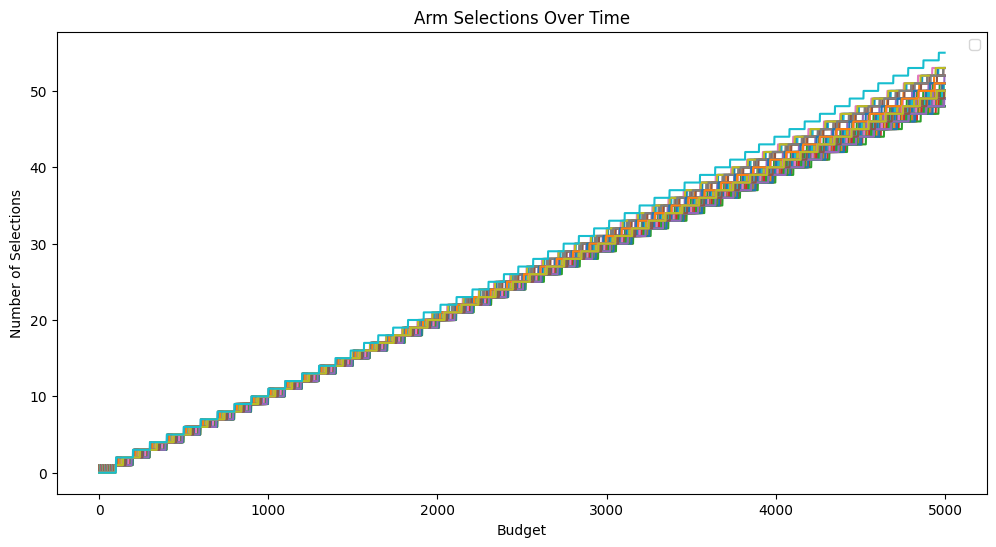

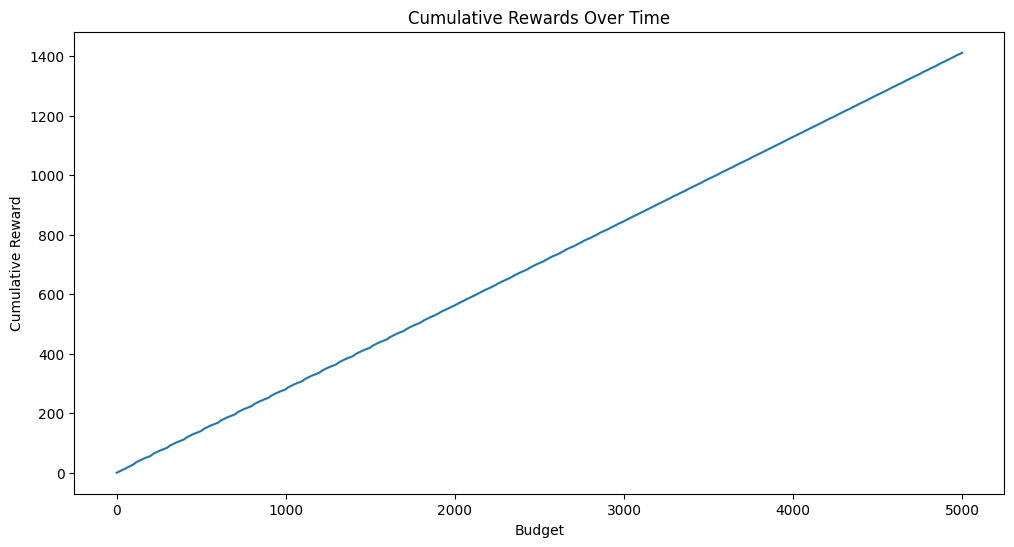

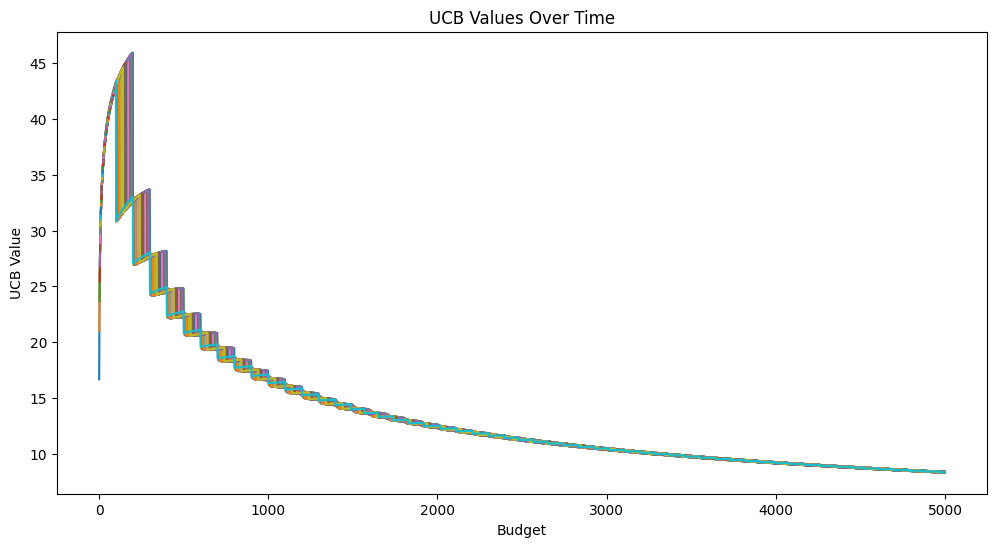

In [286]:
def plot_arm_selections(arm_selections, num_crops):
    plt.figure(figsize=(12, 6))
    plt.gca().set_prop_cycle('color', plt.cm.tab10.colors[:num_crops])
    for crop_index in range(num_crops):
        plt.plot(arm_selections[crop_index])
    plt.xlabel('Budget')
    plt.ylabel('Number of Selections')
    plt.title('Arm Selections Over Time')
    plt.legend()
    plt.show()

def plot_cumulative_rewards(cumulative_rewards):
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_rewards)
    plt.xlabel('Budget')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Rewards Over Time')
    plt.show()

def plot_ucb_values(ucb_values, num_crops):
    plt.figure(figsize=(12, 6))
    for crop_index in range(num_crops):
        plt.plot(ucb_values[crop_index])
    plt.xlabel('Budget')
    plt.ylabel('UCB Value')
    plt.title('UCB Values Over Time')
    plt.show()


# Plot the arm selections over time for local crops
plot_arm_selections(arm_selections_over_time_local, len(local_crops_df_updated_linear))

# Plot the cumulative rewards over time for local crops
plot_cumulative_rewards(cumulative_rewards_over_time_local)

# Plot the UCB values over time for local crops
plot_ucb_values(ucb_values_over_time_local, len(local_crops_df_updated_linear))

# Future Scope

# Using Law of Large Number the more the sample the more the expected mean will go to true mean 

In [287]:
# List to store sampled preferences for multiple farmers
sampled_preferences = []

# Keys of the preferences dictionary
keys = list(farmer_preferences.keys())

# Sampling preferences for multiple farmers
num_farmers = 1000  # Number of farmers
for _ in range(num_farmers):
    farmer_sample = {}
    for key in keys:
        mean_value = farmer_preferences[key]
        sampled_value = np.random.normal(mean_value, 1)  # Standard deviation of 1
        farmer_sample[key] = sampled_value
    sampled_preferences.append(farmer_sample)

sampled_preferences

[{'K_mean': -1.4842391348554766,
  'N_mean': -0.5381870235955888,
  'P_mean': 0.2962402734127984,
  'temperature_mean': -0.2782898442303656,
  'humidity_mean': -0.14039077076809114,
  'ph_mean': 1.2501408991891338,
  'rainfall_mean': 1.1979404356425787,
  'budget': 998.2889940944082},
 {'K_mean': -2.9855443999922997,
  'N_mean': 0.8544130060391597,
  'P_mean': 1.1928920835261452,
  'temperature_mean': -0.5893593129075109,
  'humidity_mean': -2.596697872233742,
  'ph_mean': -0.39961800276955395,
  'rainfall_mean': 2.862372996588506,
  'budget': 999.9878672543196},
 {'K_mean': -1.3918649796134752,
  'N_mean': 0.9189341384601282,
  'P_mean': 0.6072635553743997,
  'temperature_mean': -2.0476238947936247,
  'humidity_mean': -0.4227885216630243,
  'ph_mean': 0.5825245626889951,
  'rainfall_mean': 4.947878218333143,
  'budget': 998.5431696193743},
 {'K_mean': -0.27882921348760537,
  'N_mean': -0.7359479167357773,
  'P_mean': 1.0461851192060858,
  'temperature_mean': -1.8320261802259554,
  'hu

## Check feature vectors: Ensure that the feature vectors you're using to represent each crop capture relevant information that correlates with the crop's rewards. Review the features you've selected and consider whether they adequately capture the characteristics affecting crop selection.